The `load_and_preprocess` function is designed to load an Excel file, filter specific columns, and process the data for fake news classification. It begins by reading the Excel file specified in `file_path` and loads it into a pandas DataFrame. The function then filters the DataFrame to keep only two columns: `title` and `topic`. After that, it creates a new column called `label`, where it assigns a value of `1` if the `topic` column contains the phrase "Fake News" and `0` otherwise. The `language` parameter is used to add another column called `language`, which helps identify the language of the dataset being processed.

To ensure data quality, the function drops any rows where the `title` is missing. Finally, it returns the filtered DataFrame, which contains three columns: `title`, `label`, and `language`. The function is applied to different datasets in English, Hindi, and Bangla by passing the relevant file paths and languages as arguments, allowing each dataset to be processed in a consistent manner.

In [2]:
import pandas as pd
def load_and_preprocess(file_path, language):
    df = pd.read_excel(file_path)
    df_filtered = df[['title', 'topic']].copy()
    df_filtered['label'] = df_filtered['topic'].apply(lambda x: 1 if 'Fake News' in str(x) else 0)
    df_filtered['language'] = language
    df_filtered.dropna(subset=['title'], inplace=True)
    return df_filtered[['title', 'label', 'language']]
english_dataset_1 = load_and_preprocess('boom_english.xlsx', 'english')
hindi_dataset = load_and_preprocess('boom_hindi.xlsx', 'hindi')
bangla_dataset = load_and_preprocess('boom_bangla.xlsx', 'bangla')
english_dataset_2 = load_and_preprocess('alt_news_english.xlsx', 'english_2')

In [3]:
combined_df = pd.concat([english_dataset_1, hindi_dataset, bangla_dataset, english_dataset_2])

In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

In [5]:
X = combined_df['title']
y = combined_df['label']


The line X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) is used to split a dataset into training and testing sets. Here's what it does:

X and y represent the feature data and the target labels, respectively.
train_test_split is a function from sklearn.model_selection that splits the dataset into two sets:
X_train and y_train: These are used to train the model (80% of the data, since test_size=0.2).
X_test and y_test: These are used to test the model’s performance on unseen data (20% of the data).

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

TfidfVectorizer: This tool converts text into a matrix of TF-IDF (Term Frequency-Inverse Document Frequency) features. The TF-IDF method helps weigh the importance of a word in a document relative to how frequently it appears across all documents. Words that are common in many documents (like "the", "is", etc.) are given lower weights, while words that are specific to a document get higher weights.
stop_words='english': This removes common English stop words like "and", "the", "is", etc., which are typically not useful for distinguishing between texts.
ngram_range=(1, 2): This tells the vectorizer to consider both unigrams (single words) and bigrams (pairs of consecutive words) as features. This can help capture more context from the text by considering word combinations in addition to individual words.

vectorizer = TfidfVectorizer(stop_words='english', ngram_range=(1, 2))
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [8]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report


In [9]:
models = {
    'Naive Bayes': MultinomialNB(),
    'SVM': SVC(probability=True),
    'Random Forest': RandomForestClassifier(n_estimators=100),
    'MLP Classifier': MLPClassifier(hidden_layer_sizes=(100,), max_iter=300)
}

for model_name, model in models.items():
    print(f"Training {model_name}...")
    model.fit(X_train_vec, y_train)
    y_pred = model.predict(X_test_vec)
    print(f"Accuracy of {model_name}: {accuracy_score(y_test, y_pred)}")
    print(f"Classification Report for {model_name}:\n")
    print(classification_report(y_test, y_pred))
    print("-" * 60)

Training Naive Bayes...
Accuracy of Naive Bayes: 0.8364583333333333
Classification Report for Naive Bayes:

              precision    recall  f1-score   support

           0       0.84      1.00      0.91       802
           1       1.00      0.01      0.01       158

    accuracy                           0.84       960
   macro avg       0.92      0.50      0.46       960
weighted avg       0.86      0.84      0.76       960

------------------------------------------------------------
Training SVM...
Accuracy of SVM: 0.85
Classification Report for SVM:

              precision    recall  f1-score   support

           0       0.85      1.00      0.92       802
           1       1.00      0.09      0.16       158

    accuracy                           0.85       960
   macro avg       0.92      0.54      0.54       960
weighted avg       0.87      0.85      0.79       960

------------------------------------------------------------
Training Random Forest...
Accuracy of Random F

In [10]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from torch.optim import Adam

In [11]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [13]:

pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [14]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

nltk.download('punkt')
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))

# Tokenization function for each sentence
def tokenize_text(text):
    tokens = word_tokenize(text.lower())
    return [word for word in tokens if word.isalpha() and word not in stop_words]

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\kat92\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\kat92\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [15]:
from collections import defaultdict

Word Frequency Calculation:

word_freq = defaultdict(int) initializes a dictionary to count the frequency of each word in the texts, where each word starts with a default count of zero.
The function loops over each text in the texts collection, and for each text, it tokenizes it using the tokenize_text function, which processes the text by converting it to lowercase, removing stop words, and splitting it into individual words.
For each word in the tokenized text, the frequency count is incremented by 1 in the word_freq dictionary.
Sorting Words by Frequency:

Once all the words and their frequencies have been recorded, the function sorts the words by their frequency in descending order using sorted(word_freq.items(), key=lambda x: x[1], reverse=True). It then slices the list to keep only the vocab_size (default 10,000) most common words.
Creating the Vocabulary:

The function builds the vocabulary by enumerating through the list of most common words and assigning each word a unique index, starting from 1. The vocabulary is created as a dictionary where each word maps to its index: vocab = {word: index+1 for index, (word, _) in enumerate(most_common_words)}.
The special token '<UNK>' is added with an index of 0 to represent unknown or out-of-vocabulary words that were not included in the vocabulary.
Returning the Vocabulary:

The function returns the final vocabulary, which can be used to convert words to their corresponding index in later text processing tasks.


In [16]:
def create_vocab(texts, vocab_size=10000):
    word_freq = defaultdict(int)
    for text in texts:
        for word in tokenize_text(text):
            word_freq[word] += 1
    most_common_words = sorted(word_freq.items(), key=lambda x: x[1], reverse=True)[:vocab_size]
    
    vocab = {word: index+1 for index, (word, _) in enumerate(most_common_words)}
    vocab['<UNK>'] = 0
    return vocab
vocab = create_vocab(combined_df['title'], vocab_size=10000)

In [17]:
def text_to_sequence(text, vocab, max_len=100):
    tokens = tokenize_text(text)
    seq = [vocab.get(word, 0) for word in tokens]  
    return seq[:max_len] + [0] * (max_len - len(seq))  
X_seq = [text_to_sequence(text, vocab, max_len=100) for text in combined_df['title']]
X_seq_tensor = torch.tensor(X_seq).long()

In [18]:
from sklearn.model_selection import train_test_split
y = torch.tensor(combined_df['label'].values).float()
X_train, X_test, y_train, y_test = train_test_split(X_seq_tensor, y, test_size=0.2, random_state=42)
train_data = TensorDataset(X_train, y_train)
test_data = TensorDataset(X_test, y_test)
train_loader = DataLoader(train_data, shuffle=True, batch_size=32)
test_loader = DataLoader(test_data, batch_size=32)


In [19]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
class FakeNewsLSTM(nn.Module):
    def __init__(self, vocab_size, embedding_dim, hidden_dim, output_dim):
        super(FakeNewsLSTM, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        self.lstm = nn.LSTM(embedding_dim, hidden_dim, batch_first=True)
        self.fc = nn.Linear(hidden_dim, output_dim)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        embedded = self.embedding(x)
        lstm_out, _ = self.lstm(embedded)
        lstm_out = lstm_out[:, -1, :]  # Take the output from the last time step
        out = self.fc(lstm_out)
        return self.sigmoid(out)

# Hyperparameters
vocab_size = 10000
embedding_dim = 128
hidden_dim = 64
output_dim = 1

# Instantiate model
model = FakeNewsLSTM(vocab_size, embedding_dim, hidden_dim, output_dim).to(device)

# Loss and optimizer
criterion = nn.BCELoss()  # Binary cross-entropy for binary classification
optimizer = Adam(model.parameters(), lr=0.001)

# Training loop
epochs = 5
for epoch in range(epochs):
    model.train()
    running_loss = 0.0
    
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        
        # Zero the parameter gradients
        optimizer.zero_grad()
        
        # Forward pass
        outputs = model(inputs).squeeze()
        loss = criterion(outputs, labels)
        
        # Backward pass and optimization
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
    
    print(f'Epoch {epoch+1}/{epochs}, Loss: {running_loss/len(train_loader)}')


Epoch 1/5, Loss: 0.4026576009889444
Epoch 2/5, Loss: 0.39299014396965504
Epoch 3/5, Loss: 0.39356548674404623
Epoch 4/5, Loss: 0.3933499872684479
Epoch 5/5, Loss: 0.393217055251201


In [20]:
model.eval()
test_loss = 0.0
correct = 0

with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        
        outputs = model(inputs).squeeze()
        loss = criterion(outputs, labels)
        test_loss += loss.item()
        
        preds = (outputs >= 0.5).float()  # Threshold at 0.5
        correct += (preds == labels).sum().item()

accuracy = correct / len(test_data)
print(f'Test Loss: {test_loss/len(test_loader)}, Test Accuracy: {accuracy}')


Test Loss: 0.4513450821240743, Test Accuracy: 0.8354166666666667


In [30]:
def predict_with_lstm(input_sentence, vocab, model):
    model.eval()
    
    # Convert the input sentence to a sequence
    input_seq = text_to_sequence(input_sentence, vocab)
    input_tensor = torch.tensor([input_seq]).long().to(device)  # Add batch dimension
    
    # Predict
    with torch.no_grad():
        output = model(input_tensor).item()
    
    return "Fake News" if output >= 0.5 else "Not Fake News"

# Example usage
input_sentence = input("Enter a news headline to check if it's fake or not: ")
prediction = predict_with_lstm(input_sentence, vocab, model)
print(f"LSTM Prediction: {prediction}")


Enter a news headline to check if it's fake or not: Ex Hamas Chief Yahya Sinwar Seen Inside Tunnel Hours Before October 7 Attack
LSTM Prediction: Not Fake News


In [28]:
# def predict_fake_news(model, vectorizer, sentence):
#     sentence_vec = vectorizer.transform([sentence])
#     prediction = model.predict(sentence_vec)
#     if prediction == 1:
#         return "Fake News"
#     else:
#         return "Not Fake News"
# print("Enter a news headline to check if it's fake or not:")
# random_sentence = input()
# prediction_result = predict_fake_news(models['Naive Bayes'], vectorizer, random_sentence)
# print(f"Prediction: {prediction_result}")

Enter a news headline to check if it's fake or not:
kat
Prediction: Not Fake News


In [11]:
import re

# Validation function for input
def is_valid_input(input_sentence):
    # Check if the input has at least 3 words
    words = input_sentence.split()
    if len(words) < 3:
        return False
    
    # Check if the input contains a single repeated character/sequence
    if re.fullmatch(r'(\w)\1*', input_sentence):
        return False

    # Check if the input is a repeating sequence (e.g., "abcabcabc")
    if re.fullmatch(r'(.+?)\1+', input_sentence):
        return False
    
    return True

def predict_fake_news(models, vectorizer, sentence):
    predictions = {}

    # First, validate the input sentence
    if not is_valid_input(sentence):
        return {"Error": "Input is too short or invalid. Please enter a valid news headline."}

    # Vectorize the input sentence
    sentence_vec = vectorizer.transform([sentence])

    # Predict with each model
    for model_name, model in models.items():
        prediction = model.predict(sentence_vec)
        if prediction == 1:
            predictions[model_name] = "Fake News"
        else:
            predictions[model_name] = "Not Fake News"
    
    return predictions

# Sample usage
random_sentence = input("Enter a news headline to check if it's fake or not: ")
predictions = predict_fake_news(models, vectorizer, random_sentence)

if "Error" in predictions:
    print(predictions["Error"])  
else:
    for model_name, prediction in predictions.items():
        print(f"Model: {model_name} - Prediction: {prediction}")



Enter a news headline to check if it's fake or not: moon landing was fake
Model: Naive Bayes - Prediction: Not Fake News
Model: SVM - Prediction: Fake News
Model: Random Forest - Prediction: Not Fake News
Model: MLP Classifier - Prediction: Fake News


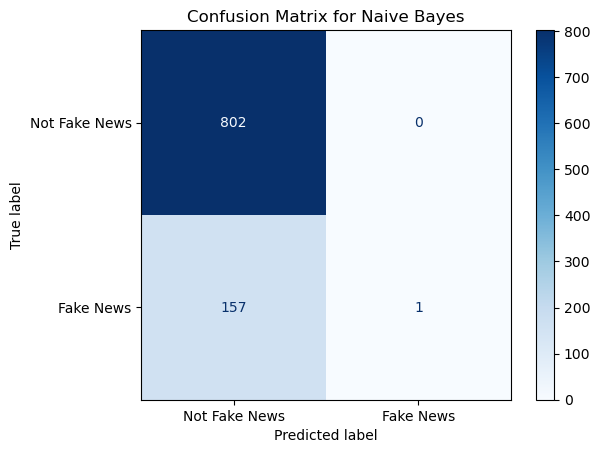

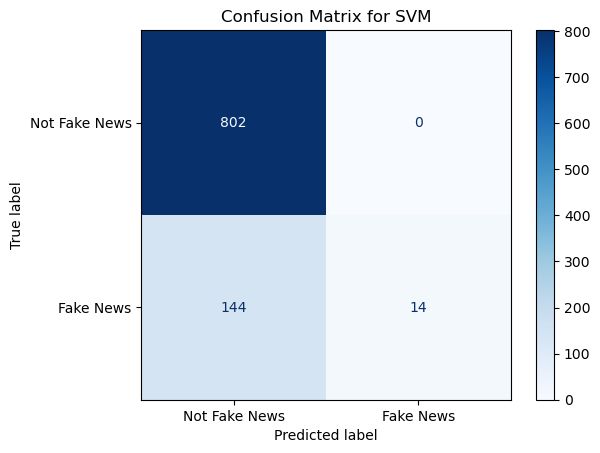

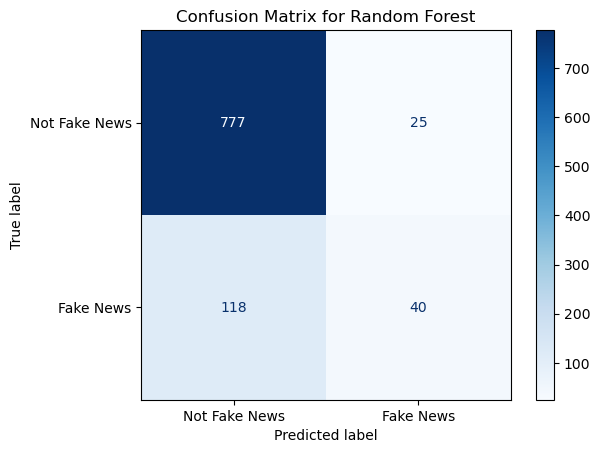

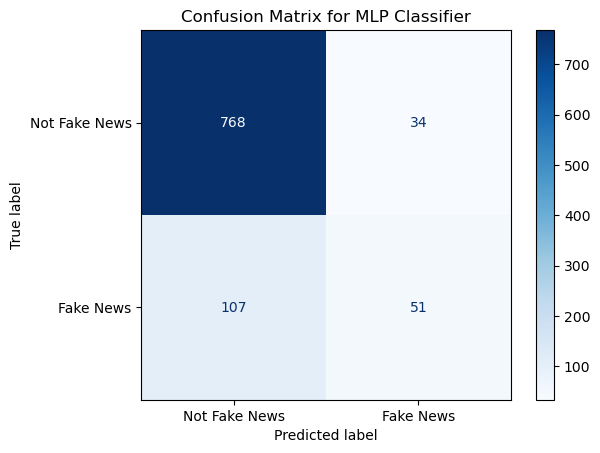

In [12]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

def plot_confusion_matrices(models, X_test, y_test, vectorizer):
    for model_name, model in models.items():
        X_test_vec = vectorizer.transform(X_test)  # Vectorize the test data
        y_pred = model.predict(X_test_vec)  # Predict on the test data
        
        # Confusion matrix
        cm = confusion_matrix(y_test, y_pred)
        disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Not Fake News", "Fake News"])
        
        # Plotting
        disp.plot(cmap=plt.cm.Blues)
        plt.title(f"Confusion Matrix for {model_name}")
        plt.show()

# Example usage
plot_confusion_matrices(models, X_test, y_test, vectorizer)


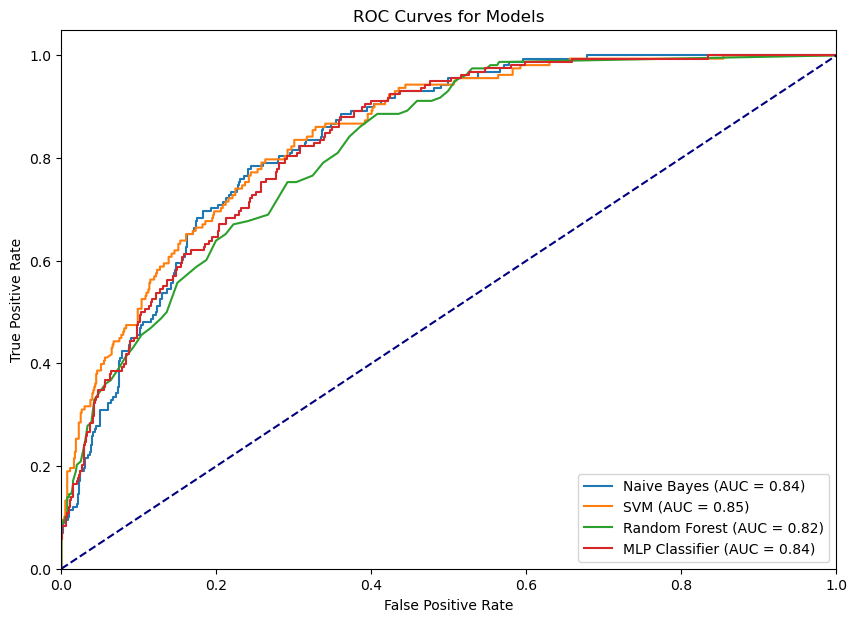

In [13]:
from sklearn.metrics import roc_curve, auc

def plot_roc_curves(models, X_test, y_test, vectorizer):
    plt.figure(figsize=(10, 7))
    
    for model_name, model in models.items():
        X_test_vec = vectorizer.transform(X_test)
        y_proba = model.predict_proba(X_test_vec)[:, 1]  # Get probabilities for the positive class
        
        fpr, tpr, _ = roc_curve(y_test, y_proba)
        roc_auc = auc(fpr, tpr)
        
        plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')
    
    plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curves for Models')
    plt.legend(loc="lower right")
    plt.show()

# Example usage
plot_roc_curves(models, X_test, y_test, vectorizer)

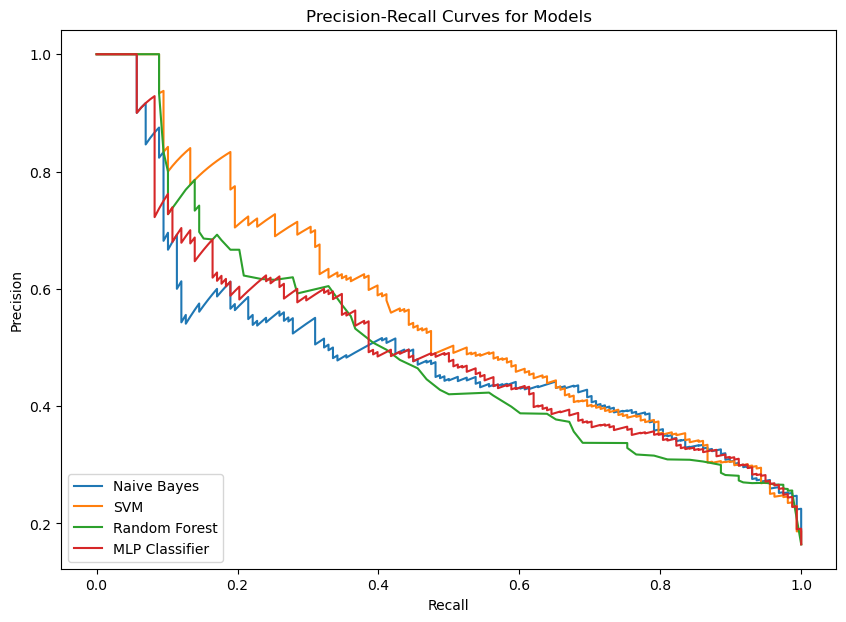

In [14]:
from sklearn.metrics import precision_recall_curve

def plot_precision_recall_curves(models, X_test, y_test, vectorizer):
    plt.figure(figsize=(10, 7))
    
    for model_name, model in models.items():
        X_test_vec = vectorizer.transform(X_test)
        y_proba = model.predict_proba(X_test_vec)[:, 1]  # Get probabilities for the positive class
        
        precision, recall, _ = precision_recall_curve(y_test, y_proba)
        
        plt.plot(recall, precision, label=f'{model_name}')
    
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curves for Models')
    plt.legend(loc="lower left")
    plt.show()

# Example usage
plot_precision_recall_curves(models, X_test, y_test, vectorizer)

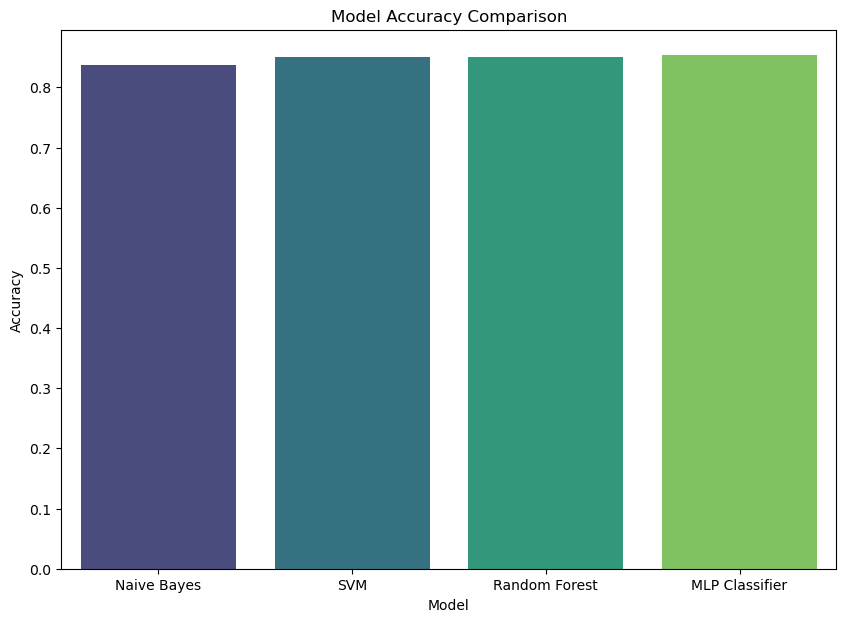

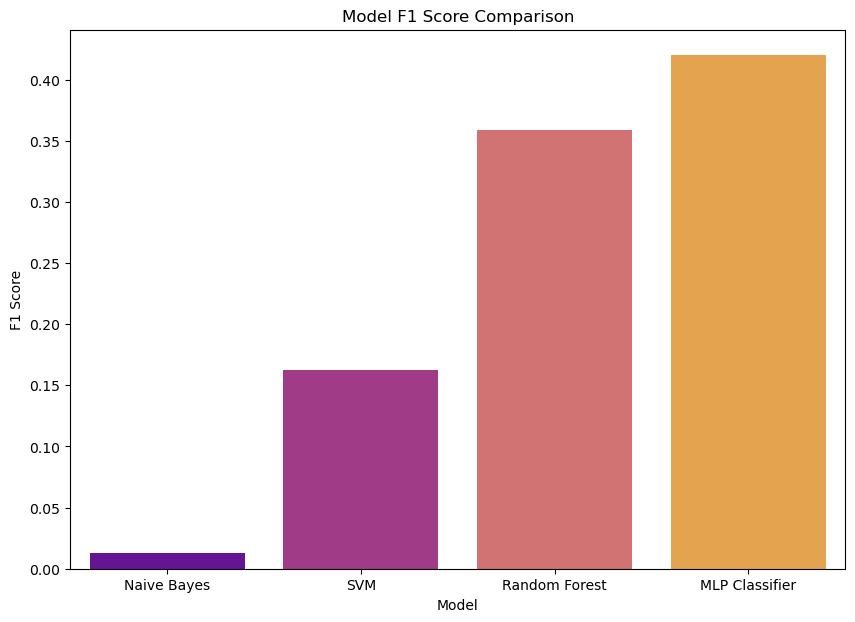

In [15]:
import numpy as np
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def plot_model_comparison(models, X_test, y_test, vectorizer):
    metrics = {
        'Model': [],
        'Accuracy': [],
        'Precision': [],
        'Recall': [],
        'F1 Score': []
    }
    
    for model_name, model in models.items():
        X_test_vec = vectorizer.transform(X_test)
        y_pred = model.predict(X_test_vec)
        
        # Calculate metrics
        metrics['Model'].append(model_name)
        metrics['Accuracy'].append(accuracy_score(y_test, y_pred))
        metrics['Precision'].append(precision_score(y_test, y_pred))
        metrics['Recall'].append(recall_score(y_test, y_pred))
        metrics['F1 Score'].append(f1_score(y_test, y_pred))
    
    # Create a DataFrame
    df_metrics = pd.DataFrame(metrics)
    
    # Plot using seaborn
    plt.figure(figsize=(10, 7))
    sns.barplot(x='Model', y='Accuracy', data=df_metrics, palette='viridis')
    plt.title('Model Accuracy Comparison')
    plt.show()

    plt.figure(figsize=(10, 7))
    sns.barplot(x='Model', y='F1 Score', data=df_metrics, palette='plasma')
    plt.title('Model F1 Score Comparison')
    plt.show()

# Example usage
plot_model_comparison(models, X_test, y_test, vectorizer)